# Netflix EDA Analysis 

The purpose of this EDA is to present some basic statistics and intuitions about the dataset. I will show any patterns or abnormalities, even if they are not directly related to the goals of the project. <br> 

My question is going to be based on what predicts subscription price (i.e. revenue). Now, this may be hard since we do not have anything on the individual's demographics, besides gender, age, device, and country.

Start by importing certain libraries:

In [221]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

#Also ignoring the warnings for neatness purposes:
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [222]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Importing the dataset from downloads:** <br>

In [223]:
netflix = pd.read_csv('Netflix Userbase.csv')

View the first 5 rows just to see what we are dealing with:

In [224]:
netflix.iloc[:2]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month


In [225]:
print("Length of Uncleaned Data:", len(netflix))

Length of Uncleaned Data: 2500


**Dealing with NaN values:** <br> 
- First, I am going to see how many rows contain NaN values:

In [226]:
checking_NaN = netflix.dropna()
print("Length of Data without NaN values:", len(checking_NaN))

Length of Data without NaN values: 2500


- Since none of the rows contain missing values, so there is no need to clean the data!
- This is very lucky, and unusual for datasets.

### **Summary Statistics:** 
To start I have just used a summary statistics table with the IQR, max, min, average, etc. Right now this is not too useful, but does allow us to gain a better picture about the data. 

NB: Only three columns are included since the remainder are strings:

In [227]:
#I have used the .T to switch the column and row titles so it helps with our readability:
netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,2500.0,1250.5000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.00,12.0,14.00,15.0
Age,2500.0,38.7956,7.171778,26.0,32.00,39.0,45.00,51.0


**Takeaways From the Table:** 
- The max. revenue from a user is 15USD, and the minimum is 10USD. 
- *From this we can assume that the lowest monthly payment subscription is 10USD, the max is 15USD.*
- The minimum age of someone paying for a subscription is 26, which seems fairly high, and the max is 51.
- The count for all is 25,000, which means we are dealing with just a tiny snapshot of netflix users, since there are far more than this!

**Starting with basic groupby functions and plotting counts:**
- I have chosen to use the groupby function and basic boxplots to take a better look at the columns with strings.

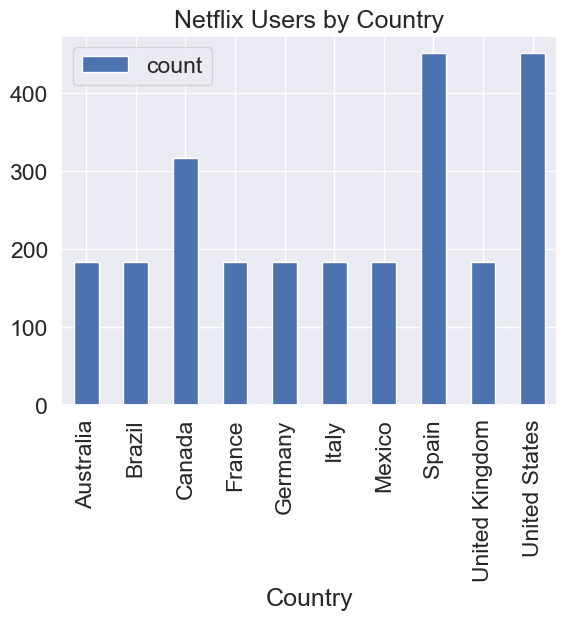

In [228]:
grouped_by_country = netflix.groupby('Country')['User ID'].agg(['count'])
grouped_by_country.plot(kind = "bar")
title("Netflix Users by Country")
show()

- The plot above shows that the USA has the most users, closely followed by Spain. 
- Canada have the third highest UserID count, and the remaining countries have relatively similar levels. 
- Only ten countries have been included in the dataset.

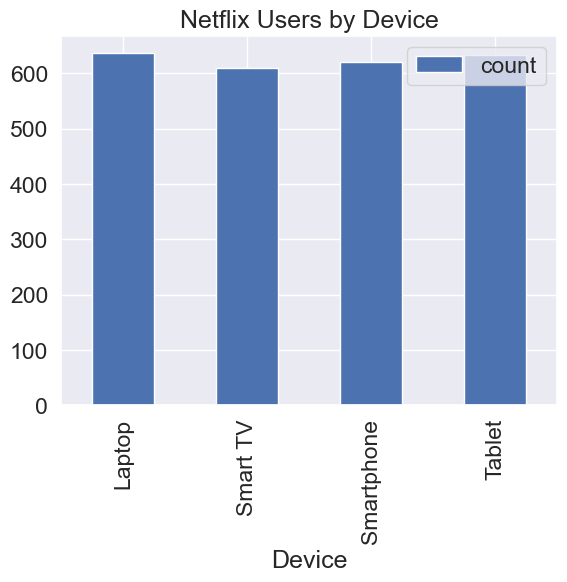

In [229]:
grouped_by_device = netflix.groupby('Device')['User ID'].agg(['count'])
grouped_by_device.plot(kind = "bar")
title("Netflix Users by Device")
show()

- The plot above shows that the four recorded devices have relatively similar numbers of netflix IDs registered.
- Interestingly, no other devices are recorded, such as PCs and Game Consoles.

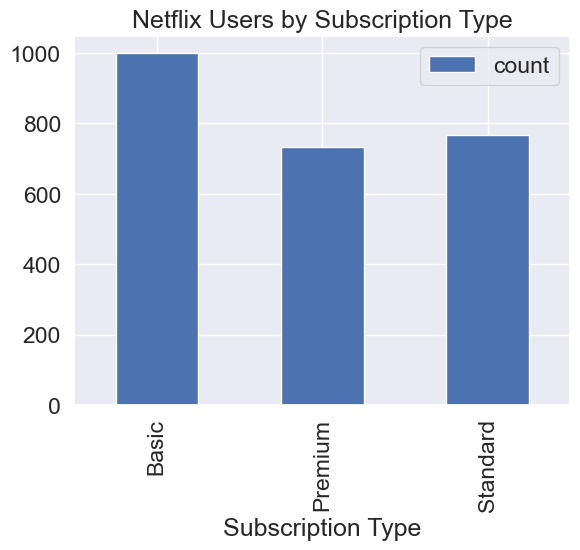

In [230]:
grouped_by_subscription = netflix.groupby('Subscription Type')['User ID'].agg(['count'])
grouped_by_subscription.plot(kind = "bar")
title("Netflix Users by Subscription Type")
show()

- The plot above shows that there are three subscription types: basic, premium, standard.
- Most netflix users have a basic subscription, and premium has the lowest number.
- Below I am going to find the price of each subscription:

*I am going to do this by creating a mask of each subscription and then printing two of the rows to see the monthly revenue (i.e. the subscription price). I have printed two rows, not one, just to make sure that the prices are the same across the subscription levels.*

In [231]:
mask = netflix['Subscription Type'] == 'Basic'
netflix[mask][:2]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [232]:
mask = netflix['Subscription Type'] == 'Premium'
netflix[mask][:2]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month


In [233]:
mask = netflix['Subscription Type'] == 'Standard'
netflix[mask][:2]

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month


- From this, Basic pricing is 10USD, Standard is 12USD, and Premium 15USD.

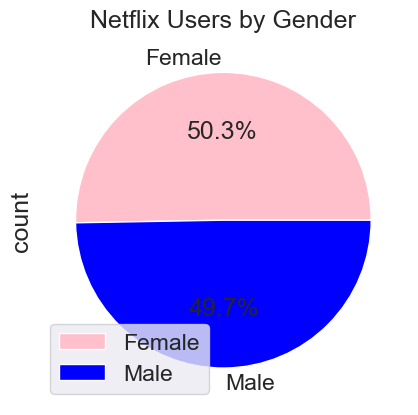

In [234]:
grouped_by_gender = netflix.groupby('Gender')['User ID'].agg(['count'])
colors = ['pink', 'blue']
grouped_by_gender.plot(kind="pie", y="count", autopct='%1.1f%%', colors=colors)
title("Netflix Users by Gender")
show()

- The split is very even, with just 0.6% variation between male and female. 

Now I have visually seen the breakdown of the categorical columns, I can continue with correlations, and more complex bar charts.

**Starting with Correlation:** <br> 
- Before I do this I need to make some of the categorical columns into numbers
- I am not going to make countries numerical as this will take a long time! 
- Since there are four devices, I am going to leave this out too.

In [235]:
#Since there are three subscriptions I am going to number them (1,2,3), 1 being premium, 2 standard, and 3 basic.
def type_to_number(subscription):
    if subscription == 'Premium':
        return 1
    elif subscription == 'Standard':
        return 2
    elif subscription == 'Basic':
        return 3

netflix['Subscription Type (numerical)'] = netflix['Subscription Type'].apply(type_to_number)

In [236]:
#For male and female making it binary: 1 being male, 0 being female:
netflix['Gender Numerical'] = netflix['Gender'].replace({'Male': 1, 'Female': 0})

In [237]:
netflix.corr()

,User ID,Monthly Revenue,Age,Subscription Type (numerical),Gender Numerical
User ID,1.000000,-0.004809,0.008065,0.001470,-0.015089
Monthly Revenue,-0.004809,1.000000,-0.021143,-0.025063,-0.006139
Age,0.008065,-0.021143,1.000000,0.016243,-0.039600
Subscription Type (numerical),0.001470,-0.025063,0.016243,1.000000,-0.013815
Gender Numerical,-0.015089,-0.006139,-0.039600,-0.013815,1.000000


None of these correlations are very strong. In fact, they are all smaller than (-) 0.04 which is tiny!

**Box Charts grouping gender and other factors:**

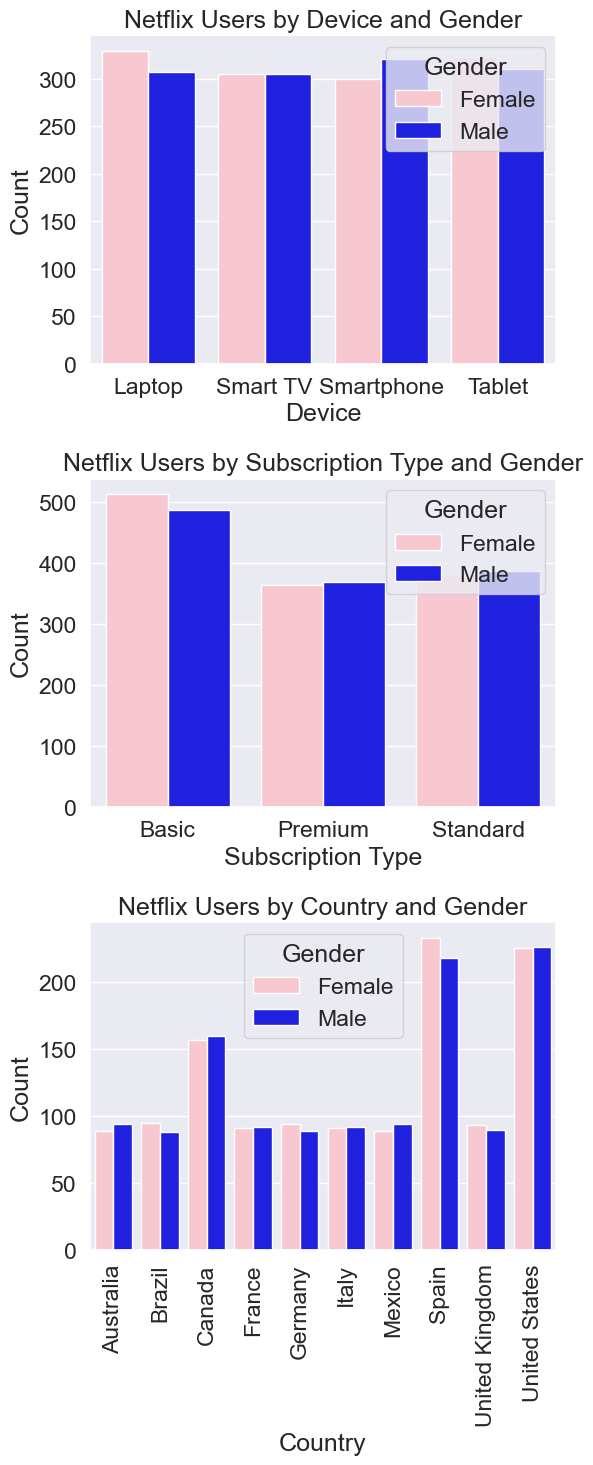

In [253]:
palette = {'Male': 'blue', 'Female': 'pink'}

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(6, 15))

#First plot - device
grouped_data1 = netflix.groupby(['Device', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='Device', y='Count', hue='Gender', data=grouped_data1, ax=ax1, palette=palette)
ax1.set_title('Netflix Users by Device and Gender')
ax1.set_xlabel('Device')
ax1.set_ylabel('Count')

#Second plot - subscription
grouped_data2 = netflix.groupby(['Subscription Type', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='Subscription Type', y='Count', hue='Gender', data=grouped_data2, ax=ax2, palette=palette)
ax2.set_title('Netflix Users by Subscription Type and Gender')
ax2.set_xlabel('Subscription Type')
ax2.set_ylabel('Count')

#Third plot - country
grouped_data3 = netflix.groupby(['Country', 'Gender']).size().reset_index(name='Count')
sns.barplot(x='Country', y='Count', hue='Gender', data=grouped_data3, ax=ax3, palette=palette)
ax3.set_title('Netflix Users by Country and Gender')
ax3.set_xlabel('Country')
ax3.set_ylabel('Count')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)  # Rotate x-axis labels

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show()

**Observations:**
- Male and female breakdowns for these three graphs are not strikingly different. In fact, the variation is very miniumal.
- The trends with the gender split still follow the trends of the overall data.

**Splitting Age Up:**

First, I am going to split age up and then plot the graph of frequencies. Note that the bar chart will be in descending order, not the order of the age. I will do another plot to do it in age order after.

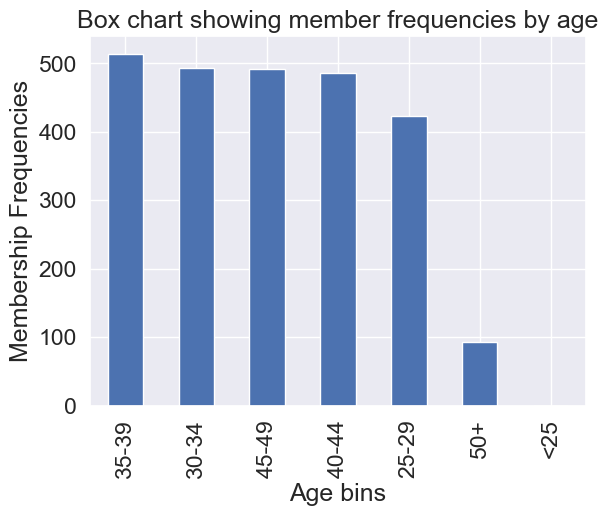

In [266]:
age_bins = [0, 25, 30, 35, 40, 45, 50, 60]  
age_labels = ['<25', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']

netflix['Age Category'] = pd.cut(netflix['Age'], bins=age_bins, labels=age_labels)

netflix['Age Category'].value_counts().plot(kind = 'bar')
xlabel("Age bins")
ylabel("Membership Frequencies")
title("Box chart showing member frequencies by age")
show()

<Axes: xlabel='Age Category'>

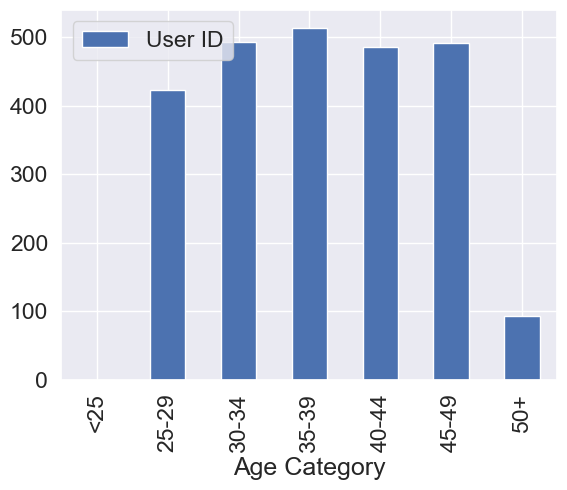

In [267]:
age_count_category = netflix.groupby(['Age Category'])[['User ID']].count()
age_count_category.plot(kind = 'bar')

The two charts show exactly the same thing, just with the categories ordered by frequency in one, and then by the actual age categories in another. The results show that the 50+ age group have a strikingly lower number of people with a netflix ID, while the ages 30 to 49 have fairly even frequencies. 

In [286]:
age_count_category2 = netflix.groupby(['Age Category', 'Subscription Type'])[['User ID']].count()
age_count_category2[3:6]

User ID
Age Category Subscription Type         
25-29        Basic                  171
             Premium                135
             Standard               117

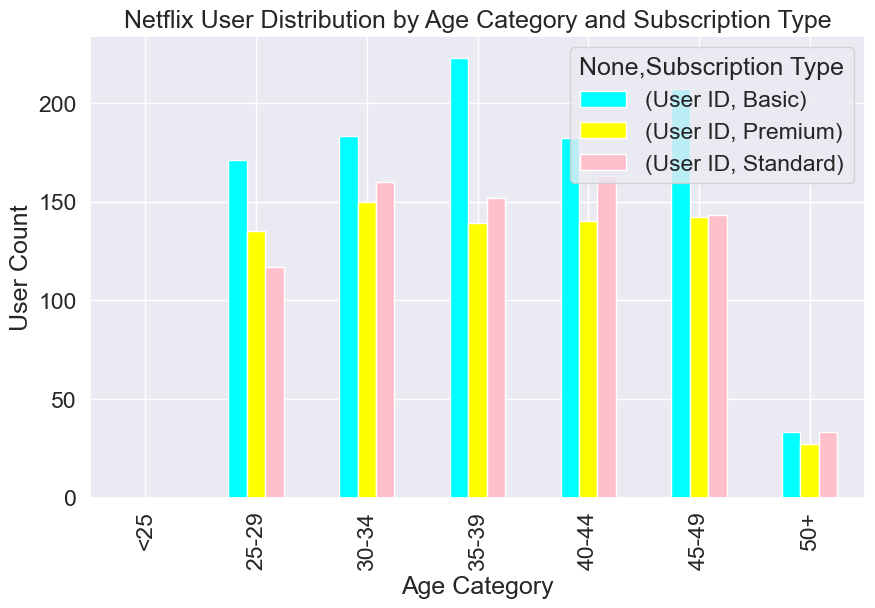

In [281]:
pivot_table = age_count_category2.unstack()
colors = ['cyan', 'yellow', 'pink']
pivot_table.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel('Age Category')
plt.ylabel('User Count')
plt.title('Netflix User Distribution by Age Category and Subscription Type')
plt.show()

In all cases, the basic subscription is the highest bar, irrespective of the age category. However, the 50+ age group has a much smaller difference between the three categories. Again, there are not any clear and overwhelming trends.

**Adjusting the join dates and analyzing:**

Making 'join date' as a time series:

In [291]:
netflix['Join Date'] = pd.to_datetime(netflix['Join Date'])
netflix2 = netflix.set_index('Join Date').sort_index()

In the graph below I have counted the number of netflix users that have joined each month, and on average every third month. In both cases it is clear that the number of users joining netflix has drastically declined at the turn of 2023. When we look at the three month average, it seems less drastic than the one month. At the back end of 2022 so many more people started to join netflix, which makes me wonder if netflix rolled out new programs, or lowered its pricing etc. 

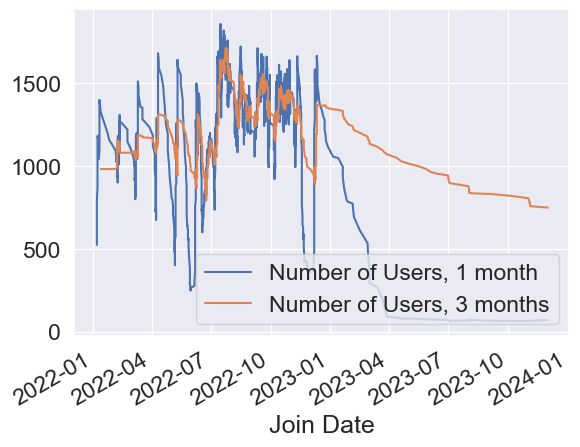

In [307]:
netflix2['User ID'].rolling(window = 30).mean().plot(label = 'Number of Users, 1 month')
netflix2['User ID'].rolling(window = 30 * 3).mean().plot(label = 'Number of Users, 3 months')

legend()

## Summary:

Overall, there are not too many overwhelmingly obvious trends in the data set. The best breakdown seems to be the graph of the rolling dates, and the breakdown of the different subscription types. 